<a href="https://colab.research.google.com/github/Omtagalpallewar27/Stock-Price-Prediction-Using-CSV/blob/main/Prediction_through_Csv_using_Nifty50_Stocks_1_Day_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

folder_path = '/content/drive/MyDrive/Dataset'

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

data = {}
for file in csv_files:
    ticker = file.split('.')[0]
    file_path = os.path.join(folder_path, file)
    try:
        data[ticker] = pd.read_csv(file_path, index_col='Date', parse_dates=True)
        print(f"Loaded data for {ticker}")
    except Exception as e:
        print(f"Error loading {file}: {e}")


print("Available tickers:", list(data.keys()))

if 'CIPLA' in data:
    print(data['CIPLA'].head())
else:
    print("Ticker 'CIPLA' not found in the data dictionary.")


Loaded data for ADANIENT
Loaded data for ADANIPORTS
Loaded data for APOLLOHOSP
Loaded data for ASIANPAINT
Loaded data for AXISBANK
Loaded data for BAJAJFINSV
Loaded data for BAJFINANCE
Loaded data for BHARTIARTL
Loaded data for BPCL
Loaded data for BRITANNIA
Loaded data for CIPLA
Loaded data for COALINDIA
Loaded data for DIVISLAB
Loaded data for DRREDDY
Loaded data for EICHERMOT
Loaded data for GRASIM
Loaded data for HCLTECH
Loaded data for HDFC
Loaded data for HDFCBANK
Loaded data for HDFCLIFE
Loaded data for HEROMOTOCO
Loaded data for HINDALCO
Loaded data for HINDUNILVR
Loaded data for ICICIBANK
Loaded data for INDUSINDBK
Loaded data for INFY
Loaded data for IOC
Loaded data for ITC
Loaded data for JSWSTEEL
Loaded data for KOTAKBANK
Loaded data for LT
Loaded data for M&M
Loaded data for MARUTI
Loaded data for NESTLEIND
Loaded data for NTPC
Loaded data for ONGC
Loaded data for POWERGRID
Loaded data for RELIANCE
Loaded data for SBILIFE
Loaded data for SBIN
Loaded data for SHREECEM
Loade

In [ ]:
def preprocess_data(df):
    df = df[['Close']]
    df.dropna(inplace=True)
    return df

for ticker in data.keys():
    data[ticker] = preprocess_data(data[ticker])


<ipython-input-4-e0acb01884fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
<ipython-input-4-e0acb01884fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
<ipython-input-4-e0acb01884fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
<ipython-input-4-e0acb01884fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

In [ ]:
def create_features(df, window_size=60):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df)

    X, y = [], []
    for i in range(window_size, len(scaled_data)):
        X.append(scaled_data[i-window_size:i, 0])
        y.append(scaled_data[i, 0])

    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    return X, y, scaler

if 'CIPLA' in data:
    X, y, scaler = create_features(data['CIPLA'])
else:
    print("Ticker 'CIPLA' not found. Please check the available tickers and ensure the file is correctly named.")


In [ ]:
def train_test_split(X, y, test_size=0.2):
    split_index = int(X.shape[0] * (1 - test_size))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    return X_train, X_test, y_train, y_test

if 'CIPLA' in data:
    X_train, X_test, y_train, y_test = train_test_split(X, y)
else:
    print("Ticker 'CIPLA' not found. Please check the available tickers and ensure the file is correctly named.")


In [ ]:
def create_model():
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

if 'CIPLA' in data:
    model = create_model()
    model.fit(X_train, y_train, epochs=20, batch_size=32)
else:
    print("Ticker 'CIPLA' not found. Please check the available tickers and ensure the file is correctly named.")


Epoch 1/20
30/30 [==============================] - 7s 46ms/step - loss: 0.0350
Epoch 2/20
30/30 [==============================] - 1s 46ms/step - loss: 0.0042
Epoch 3/20
30/30 [==============================] - 1s 47ms/step - loss: 0.0025
Epoch 4/20
30/30 [==============================] - 1s 48ms/step - loss: 0.0026
Epoch 5/20
30/30 [==============================] - 1s 48ms/step - loss: 0.0023
Epoch 6/20
30/30 [==============================] - 1s 47ms/step - loss: 0.0023
Epoch 7/20
30/30 [==============================] - 2s 68ms/step - loss: 0.0024
Epoch 8/20
30/30 [==============================] - 2s 80ms/step - loss: 0.0022
Epoch 9/20
30/30 [==============================] - 2s 54ms/step - loss: 0.0019
Epoch 10/20
30/30 [==============================] - 1s 46ms/step - loss: 0.0018
Epoch 11/20
30/30 [==============================] - 1s 47ms/step - loss: 0.0018
Epoch 12/20
30/30 [==============================] - 1s 47ms/step - loss: 0.0017
Epoch 13/20
30/30 [==================

8/8 [==============================] - 2s 20ms/step


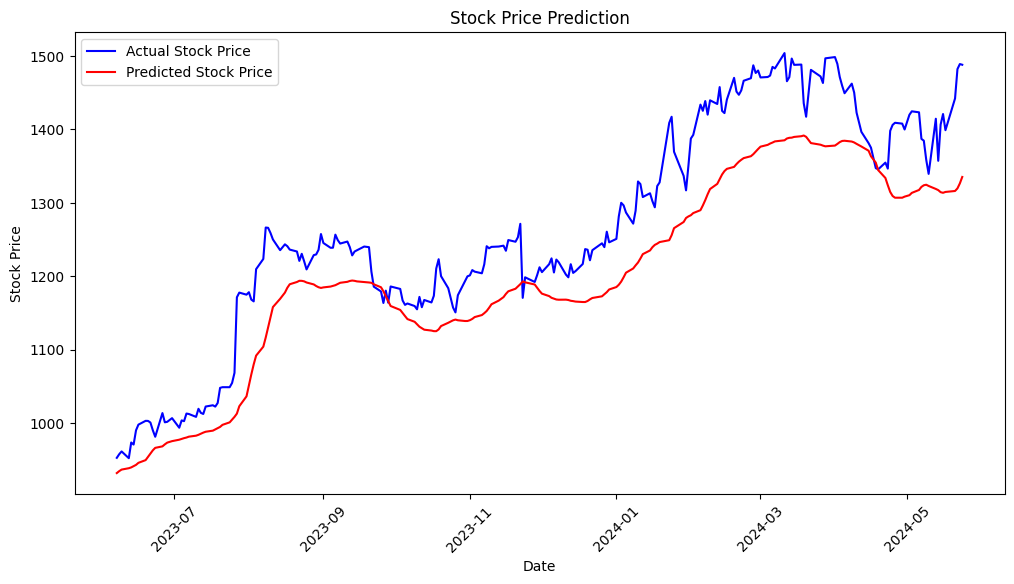

In [ ]:
def plot_predictions(dates, y_true, y_pred, title):
    plt.figure(figsize=(12, 6))
    plt.plot(dates, y_true, color='blue', label='Actual Stock Price')
    plt.plot(dates, y_pred, color='red', label='Predicted Stock Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

if 'CIPLA' in data:
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    dates = data['CIPLA'].index[-len(y_test):]

    plot_predictions(dates, y_test_actual, predictions, 'Stock Price Prediction')
else:
    print("Ticker 'CIPLA' not found. Please check the available tickers and ensure the file is correctly named.")
